In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
import glob
from astropy import units as u


In [122]:
#Glob away all the fits in a dir
fits_list = glob.glob("/home/kevin/WORK/coding/sdsswork/sdss_spectra/sky_flux/sdss_fits_files/*.fits")
 #glob.glob("sdss_fits_files/*.fits")
print(fits_list)

#Extra the fits tables from all the globbed fits
specdata_list=[]
for i in fits_list:
    with fits.open(i) as fit_file:
        specdata=fit_file[1].data
        header=fit_file[0].header
        specdata_list.append(specdata)


#Get the shapes of each spectra then find the smallest shape along 0 axis
spec_shape_list=[]
for i in specdata_list:
    spec_shape_list.append(i.shape)

spec_shape_list=np.array(spec_shape_list)
smallest_spec=np.min(spec_shape_list)

['/home/kevin/WORK/coding/sdsswork/sdss_spectra/sky_flux/sdss_fits_files/spec-1947-53431-0275.fits', '/home/kevin/WORK/coding/sdsswork/sdss_spectra/sky_flux/sdss_fits_files/spec-1947-53431-0343.fits', '/home/kevin/WORK/coding/sdsswork/sdss_spectra/sky_flux/sdss_fits_files/spec-2342-53742-0472.fits', '/home/kevin/WORK/coding/sdsswork/sdss_spectra/sky_flux/sdss_fits_files/spec-1950-53436-0318.fits', '/home/kevin/WORK/coding/sdsswork/sdss_spectra/sky_flux/sdss_fits_files/spec-2342-53742-0365.fits', '/home/kevin/WORK/coding/sdsswork/sdss_spectra/sky_flux/sdss_fits_files/spec-1947-53431-0292.fits', '/home/kevin/WORK/coding/sdsswork/sdss_spectra/sky_flux/sdss_fits_files/spec-2342-53742-0638.fits', '/home/kevin/WORK/coding/sdsswork/sdss_spectra/sky_flux/sdss_fits_files/spec-2297-53738-0130.fits', '/home/kevin/WORK/coding/sdsswork/sdss_spectra/sky_flux/sdss_fits_files/spec-1947-53431-0352.fits', '/home/kevin/WORK/coding/sdsswork/sdss_spectra/sky_flux/sdss_fits_files/spec-2341-53738-0491.fits',

In [123]:
loglam_vals=specdata_list[1]['loglam']  
loglam_low=loglam_vals[1+300]
loglam_hi=loglam_vals[-1-300]


spec1=specdata_list[1]
mask1=(spec1.loglam>=loglam_low) & (spec1.loglam<=loglam_hi)
spec1_m=spec1[mask1]
target_length = np.int64(spec1_m.shape[0])



target_length = np.int64(spec1_m.shape[0])
spectra_filtered_list = []
for i in specdata_list:
    spec = i
    mask=(spec.loglam>=loglam_low) & (spec.loglam<=loglam_hi)
    filtered_data = spec[mask]
    # Adjust the length to match target_length
    if len(filtered_data) < target_length:
        # If shorter, pad with NaNs or another value of choice and relpace missing vals with mean of the spectrum
        filtered_data = np.pad(filtered_data, (0, target_length - len(filtered_data)), constant_values=np.mean(filtered_data['sky'])) 
    elif len(filtered_data) > target_length:
        # If longer, truncate
        filtered_data = filtered_data[:target_length]

    spectra_filtered_list.append(filtered_data)
    
spectra_filtered_list = np.array(spectra_filtered_list)



In [124]:
mean_sky=np.median(spectra_filtered_list['sky'], axis=0)

In [125]:
sky_res=[]

for sky in spectra_filtered_list['sky']:
    residual=sky-mean_sky
    sky_res.append(residual)
sky_res=np.array(sky_res)

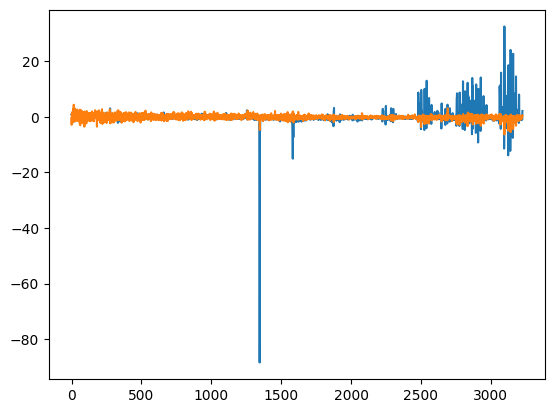

In [132]:
plt.plot(sky_res[112])
plt.plot(spectra_filtered_list[112]['flux'])